### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import *

### Data

    - Download of the stock exchange prices traded from 1st January 2014 to today
    - Stock exchange prices display

[*********************100%%**********************]  7 of 7 completed


array([[<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">],
       [<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">],
       [<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">],
       [<Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">,
        <Axes: xlabel='Date', ylabel="Valeur de l'action en U.S. $">]],
      dtype=object)

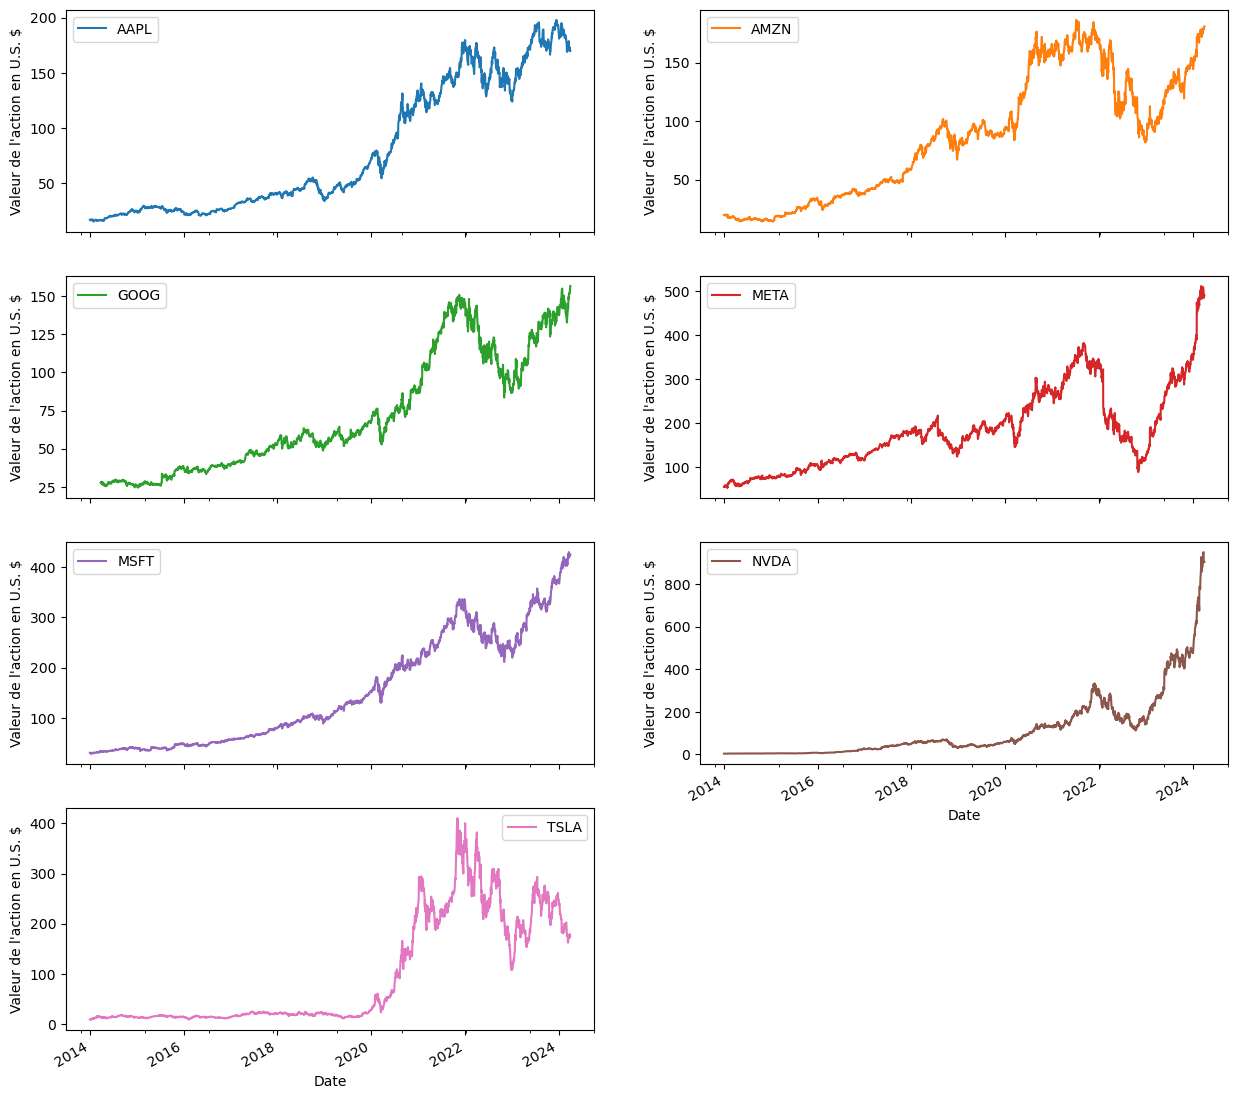

In [2]:
today_date = str(date.today())
share_names = ["AAPL", "NVDA", "TSLA", "AMZN", "META", "MSFT", "GOOG"]
df = yf.download(share_names, start = '2014-01-01', end = today_date)
df['Adj Close'].plot(subplots = True, layout = (4, 2), xlabel = 'Date', ylabel = "Valeur de l'action en U.S. $", figsize = (15, 15))

### Function
    This function named 'information' displays : 
        1) The returns 
        2) The mean
        3) The standard deviation
        4) The sharp ratio
        5) The skew
        6) The kurtosis

In [3]:
def information(nom):
    returnsinpct = df['Adj Close'][nom].pct_change().fillna(0)
    returnsmoy = returnsinpct.mean()*252
    returnsstd = returnsinpct.std()*np.sqrt(252)
    skew = returnsinpct.skew()
    kurtosis = returnsinpct.kurt()
    
    titles = ['Current Value in US $', 'Annualized Average Return', 'Annualized Standard Deviation of Returns', "Sharp Ratio", "Skew", "Kutosis"]
    current_value = df['Adj Close'][nom][-1]
    valeurs = [current_value, returnsmoy, returnsstd, returnsmoy/returnsstd, skew, kurtosis]
    df1 = pd.DataFrame({'Value' : valeurs} )
    df1.index = titles
    
    
    
    fig,axs = plt.subplots(1, 2, figsize = (15, 10))
    axs[0].plot(df['Adj Close'][nom])
    axs[1].plot(returnsinpct)
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel("Cours de l'action en US $")
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Rendement journalier en %')
    
    
    return df1, axs

,Value
Current Value in US $,903.630005
Annualized Average Return,0.643755
Annualized Standard Deviation of Returns,0.465001
Sharp Ratio,1.384418
Skew,0.716086
Kutosis,9.759533


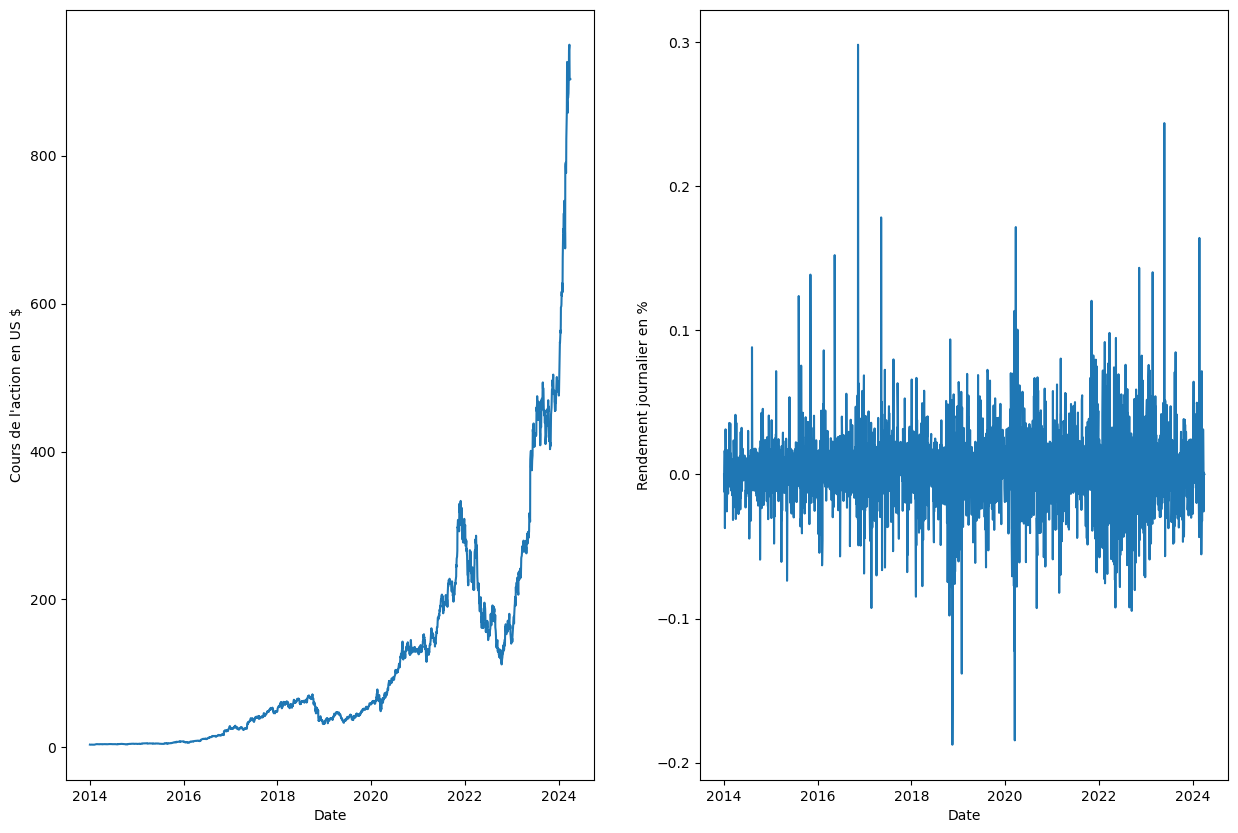

In [4]:
basic_metrics = information('NVDA')[0]
basic_metrics

### Functions
    1) Return's mean
    2) Return'Standard Deviation
    3) Skew
    4) Kurtosis
    5) Max DrawDown & Normalized Max Drawdown
    6) Return's correlation 
    7) VaR
    8) CVaR
    9) Concatenation of all those metrics

In [5]:
def mean_return(returnsinpct):
    returnsmean = returnsinpct.mean()*252
    returns_mean = returnsmean.to_frame(name = 'Annualized Average Return')
    
    return returns_mean

def std_return(returnsinpct):
    returnsstd = returnsinpct.std()*np.sqrt(252)
    returns_std = returnsstd.to_frame(name = 'Annualized Standard Deviation of Returns')
    
    return returns_std

def skew(returnsinpct):
    returnsskew = returnsinpct.skew()
    returns_skew = returnsskew.to_frame(name = 'Skew')
    
    return returns_skew

def kurtosis(returnsinpct):
    returnskurtosis = returnsinpct.kurt()
    returns_kurtosis = returnskurtosis.to_frame(name = 'Kurtosis')
    
    return returns_kurtosis

def max_draw_down(returnsinpct):
    max_dd = returnsinpct.min()
    max_dd_df = max_dd.to_frame(name='Max Draw Down')
    
    return max_dd_df

def std_max_draw_down(returnsinpct):
    std_max_dd = (returnsinpct.min()/(returnsinpct.std()*np.sqrt(252)))
    std_max_dd_df = std_max_dd.to_frame(name='Standardized Max Draw Down')

    return std_max_dd_df

def val_at_risk(df, confidence):
    a = []

    for nom in share_names : 
        valeurs = df['Adj Close'][nom].pct_change().fillna(0)
        a.append(valeurs.sort_values(ascending = True, inplace = False, ignore_index = True))
    
    sorted_returns = pd.DataFrame(a)
    
    position = int((1-confidence)*sorted_returns.shape[1])
    
    value_at_risk = sorted_returns[:][position].to_frame(name = 'Value at Risk')
    
    return value_at_risk

def conditional_val_at_risk(df, confidence):
    a = []
    
    for nom in share_names:
        valeurs = df['Adj Close'][nom].pct_change().fillna(0)
        a.append(valeurs.sort_values(ascending = True, inplace = False, ignore_index = True))
    
    
    sorted_returns = pd.DataFrame(a)
    
    position = int((1-confidence)*sorted_returns.shape[1])
    
    c_value_at_risk = sorted_returns.iloc[ : , : position].mean(axis=1).to_frame(name = 'Expected Shortfall (CVaR)')
    
    return c_value_at_risk

def correlation(returnsinpct):
    corr_matrix = returnsinpct.corr()
    
    return corr_matrix

def concatenation(returnsinpct, df, confidence_level):
    returnsmean = mean_return(returnsinpct)
    returnsstd = std_return(returnsinpct)
    returnsskew = skew(returnsinpct)
    returnskurtosis = kurtosis(returnsinpct)
    maxdd = max_draw_down(returnsinpct)
    stdmaxdd = std_max_draw_down(returnsinpct)
    var = val_at_risk(df, confidence_level)
    cvar = conditional_val_at_risk(df, confidence_level)
    
    
    total = pd.concat([returnsmean, returnsstd, returnsskew, returnskurtosis, maxdd, stdmaxdd, var, cvar], axis = 1)
    
    return total

In [6]:
concatenation(df['Adj Close'].pct_change().fillna(0), df, 0.95)

,Annualized Average Return,Annualized Standard Deviation of Returns,Skew,Kurtosis,Max Draw Down,Standardized Max Draw Down,Value at Risk,Expected Shortfall (CVaR)
AAPL,0.263343,0.282246,-0.031026,5.558317,-0.128647,-0.455797,-0.026708,-0.040961
AMZN,0.270232,0.330193,0.263630,6.411527,-0.140494,-0.425492,-0.031020,-0.047437
GOOG,0.207185,0.277393,0.232553,7.028229,-0.111008,-0.400183,-0.026240,-0.040267
META,0.286611,0.377335,-0.222413,21.091561,-0.263901,-0.699382,-0.033933,-0.053006
MSFT,0.291353,0.268996,0.105003,7.887316,-0.147390,-0.547927,-0.026283,-0.038290
NVDA,0.643755,0.465001,0.716086,9.759533,-0.187559,-0.403351,-0.042562,-0.062487
TSLA,0.433360,0.554576,0.204984,4.412080,-0.210628,-0.379801,-0.050881,-0.078085
